In [50]:
#  https://www.jianshu.com/p/5db596333dfb

In [20]:
setwd('/import/hd/sc')

In [21]:
library(nichenetr)
library(Seurat) # please update to Seurat V4
library(tidyverse)

In [22]:
seuratObj <- readRDS('/import/hd/SCE.rds')
seuratObj@meta.data %>% head()
seuratObj@meta.data$celltype %>% table() 

,orig.ident,nCount_Spatial,nFeature_Spatial,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,SCT_snn_res.0.5,slice,region,integrated_snn_res.0.6
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<chr>,<dbl>,<chr>,<fct>
AACACTTGGCAAGGAA-1_1,OA7,15411,5859,0.908442,12119,5825,1,7,3,NA,NA,7
AACAGGAAGAGCATAG-1_1,OA7,17533,7147,1.962014,12284,6887,2,6,2,NA,NA,6
AACAGTCAGGCTCCGC-1_1,OA7,3266,1994,3.459890,9319,2821,10,1,4,NA,NA,1
AACAGTCCACGCGGTG-1_1,OA7,21735,6960,1.702323,11882,5749,10,1,4,NA,NA,1
AACATACTCATATGCG-1_1,OA7,18866,7427,2.544260,12373,6946,2,6,2,NA,NA,6
AACATAGTCTATCTAC-1_1,OA7,24360,8134,1.457307,12028,6259,13,11,10,NA,NA,11


< table of extent 0 >

In [23]:
organism = "human"
lr_network = readRDS("/import/DB/nichenetr/lr_network_human_21122021.rds")

In [24]:
ligand_target_matrix=readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
weighted_networks = readRDS("/import/DB/nichenetr/weighted_networks_nsga2r_final.rds")
ligand_target_matrix <- readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


In [25]:
lr_network <- readRDS('/import/DB/nichenetr/lr_network_human_21122021.rds')
lr_network = lr_network %>% distinct(from, to)
head(lr_network)

from,to
<chr>,<chr>
A2M,MMP2
A2M,MMP9
A2M,LRP1
A2M,KLK3
AANAT,MTNR1A
AANAT,MTNR1B


In [26]:
weighted_networks <- readRDS('/import/DB/nichenetr/weighted_networks_nsga2r_final.rds')
weighted_networks_lr = weighted_networks$lr_sig %>% inner_join(lr_network, by = c("from","to"))
head(weighted_networks$lr_sig)

from,to,weight
<chr>,<chr>,<dbl>
A-GAMMA3'E,ACTG1P11,0.10018411
A-GAMMA3'E,AXIN2,0.08687722
A-GAMMA3'E,BUB1B-PAK6,0.09322200
A-GAMMA3'E,CEACAM7,0.07927829
A-GAMMA3'E,CHRNA1,0.09010287
A-GAMMA3'E,DTX2P1,0.09758541


In [27]:
head(weighted_networks$gr) 

from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.16500026
AAAS,GFAP,0.09064868
AADAC,CTAG1B,0.10358772
AADAC,CYP3A4,0.17727654
AADAC,DIRAS3,0.09359021
AADAC,IRF8,0.08918009


In [28]:
table(seuratObj$seurat_clusters,seuratObj$orig.ident)

    
      N2 OA7
  0  294 447
  1  207 533
  2  168 387
  3  182 333
  4  218 132
  5   54 284
  6   71 254
  7   45 275
  8    5 125
  9   10 112
  10  54  43
  11   0  57

In [29]:
Idents(seuratObj) <- 'seurat_clusters'
receiver = "3"
expressed_genes_receiver = get_expressed_genes(receiver, seuratObj, pct = 0.10)
background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
## sender
sender_celltypes = c("7")
list_expressed_genes_sender = sender_celltypes %>% unique() %>% lapply(get_expressed_genes, seuratObj, 0.10) # lapply to get the expressed genes of every sender cell type separately here
expressed_genes_sender = list_expressed_genes_sender %>% unlist() %>% unique()

Warning message in get_expressed_genes(receiver, seuratObj, pct = 0.1):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"
Warning message in FUN(X[[i]], ...):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"


### https://lishensuo.github.io/posts/bioinfo/029%E5%8D%95%E7%BB%86%E8%83%9E%E5%88%86%E6%9E%90%E5%B7%A5%E5%85%B7--nichenet%E7%BB%86%E8%83%9E%E9%80%9A%E8%AE%AF%E5%88%86%E6%9E%90/

In [30]:
table(seuratObj$orig.ident)


  N2  OA7 
1308 2982 

In [93]:
nichenet_output =  nichenet_seuratobj_aggregate(
  seurat_obj = seuratObj, # Seurat对象，其active.ident需设置为细胞类型
  expression_pct = 0.10,  # 界定细胞类型是否表达配/受体的比例阈值，默认为0.1
  #organism = "human", # 交代物种信息，默认为人类 c("human","mouse")
  #Group
  condition_colname = "orig.ident",   # 交代分组的meta名
  condition_oi = "OA7", condition_reference = "N2", # 交代实验组与对照组名 
  # receiver
  receiver = "3",  # 交代receiver细胞类型
  geneset = "DE", # 判断特定基因集的方法，默认使用全部差异基因(oi/ref)c("DE","up","down")
  lfc_cutoff = 0.25, # 判断差异基因的阈值
  # sender
  sender = c("7"), #设置可能的sender cell 
  top_n_targets = 100,  #每个ligand最多考虑200个target gene
  top_n_ligands = 30,   #给出最有可能的20个上游ligand
  cutoff_visualization = 0.33,  #设置可视化ligand-target scores的阈值
  # refer data
  ligand_target_matrix = ligand_target_matrix, 
  lr_network = lr_network, 
  weighted_networks = weighted_networks, 
  )


Warning message in nichenet_seuratobj_aggregate(seurat_obj = seuratObj, expression_pct = 0.1, :
"You are going to apply NicheNet on a spatial seurat object. Be sure it's ok to use NicheNet the way you are planning to do it. So this means: you should have changes in gene expression in receiver cells caused by cell-cell interactions. Note that in the case of spatial transcriptomics, you are not dealing with single cells but with 'spots' containing multiple cells of the same of different cell types."
Warning message in nichenet_seuratobj_aggregate(seurat_obj = seuratObj, expression_pct = 0.1, :
"Seurat object is result from the Seurat integration workflow. Make sure that the way of defining expressed and differentially expressed genes in this wrapper is appropriate for your integrated data."


[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"


Warning message in FUN(X[[i]], ...):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"
Warning message in FUN(X[[i]], ...):
"Seurat object is result from the Seurat integration workflow. The expressed genes are now defined based on the integrated slot. You can change this via the assay_oi parameter of the get_expressed_genes() functions. Recommended assays: RNA or SCT"


[1] "Perform DE analysis in receiver cell"
[1] "Perform NicheNet ligand activity analysis"
[1] "Infer active target genes of the prioritized ligands"
[1] "Infer receptors of the prioritized ligands"
[1] "Perform DE analysis in sender cells"


Warning message:
"Only one identity present, the expression values will be not scaled"


In [94]:
nichenet_output %>% names()

[1] "ligand_activities"                     
 [2] "top_ligands"                           
 [3] "top_targets"                           
 [4] "top_receptors"                         
 [5] "ligand_target_matrix"                  
 [6] "ligand_target_heatmap"                 
 [7] "ligand_target_df"                      
 [8] "ligand_expression_dotplot"             
 [9] "ligand_differential_expression_heatmap"
[10] "ligand_activity_target_heatmap"        
[11] "ligand_receptor_matrix"                
[12] "ligand_receptor_heatmap"               
[13] "ligand_receptor_df"                    
[14] "geneset_oi"                            
[15] "background_expressed_genes"

In [95]:
nichenet_output$top_ligands

[1] "COL17A1"  "TIMP2"    "APOC3"    "GJB2"     "APOA5"    "CCL14"   
 [7] "IL32"     "CXCL12"   "SEMA3C"   "GDF5"     "ANGPTL3"  "COL4A1"  
[13] "TGFB2"    "APOC2"    "CXCL1"    "EDIL3"    "ANPEP"    "TGFB1"   
[19] "APOA2"    "GCG"      "BMP6"     "SERPINA5" "CD55"     "RELN"    
[25] "CX3CL1"   "CD1D"     "OSM"      "ITIH2"    "HP"       "COL5A2"

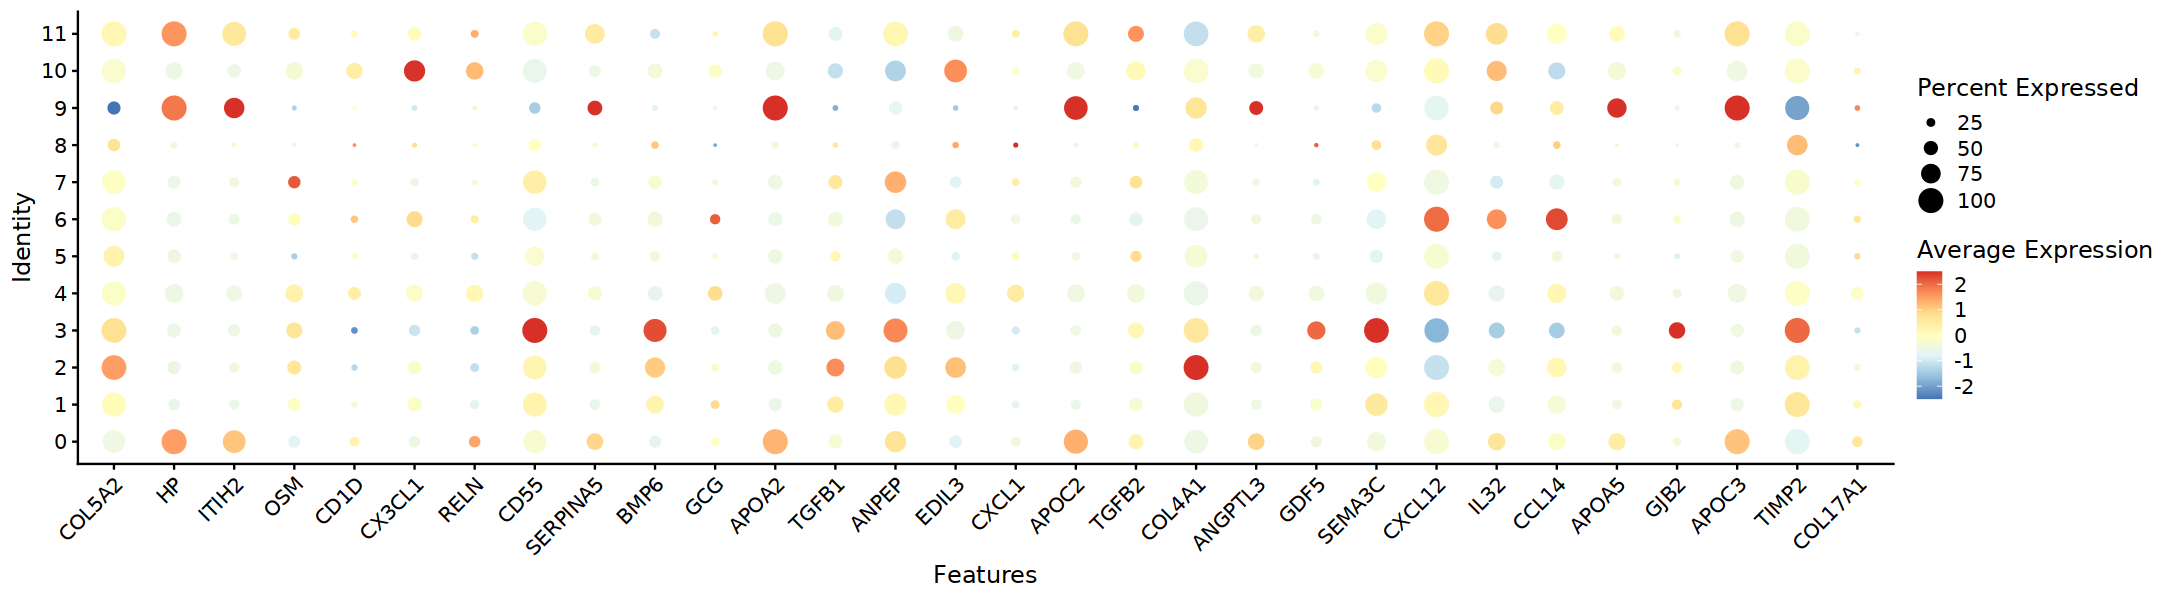

In [96]:
DotPlot(seuratObj, features = nichenet_output$top_ligands %>% rev(), cols = "RdYlBu") + RotatedAxis()

In [97]:
options(repr.plot.width =9,repr.plot.height = 14)

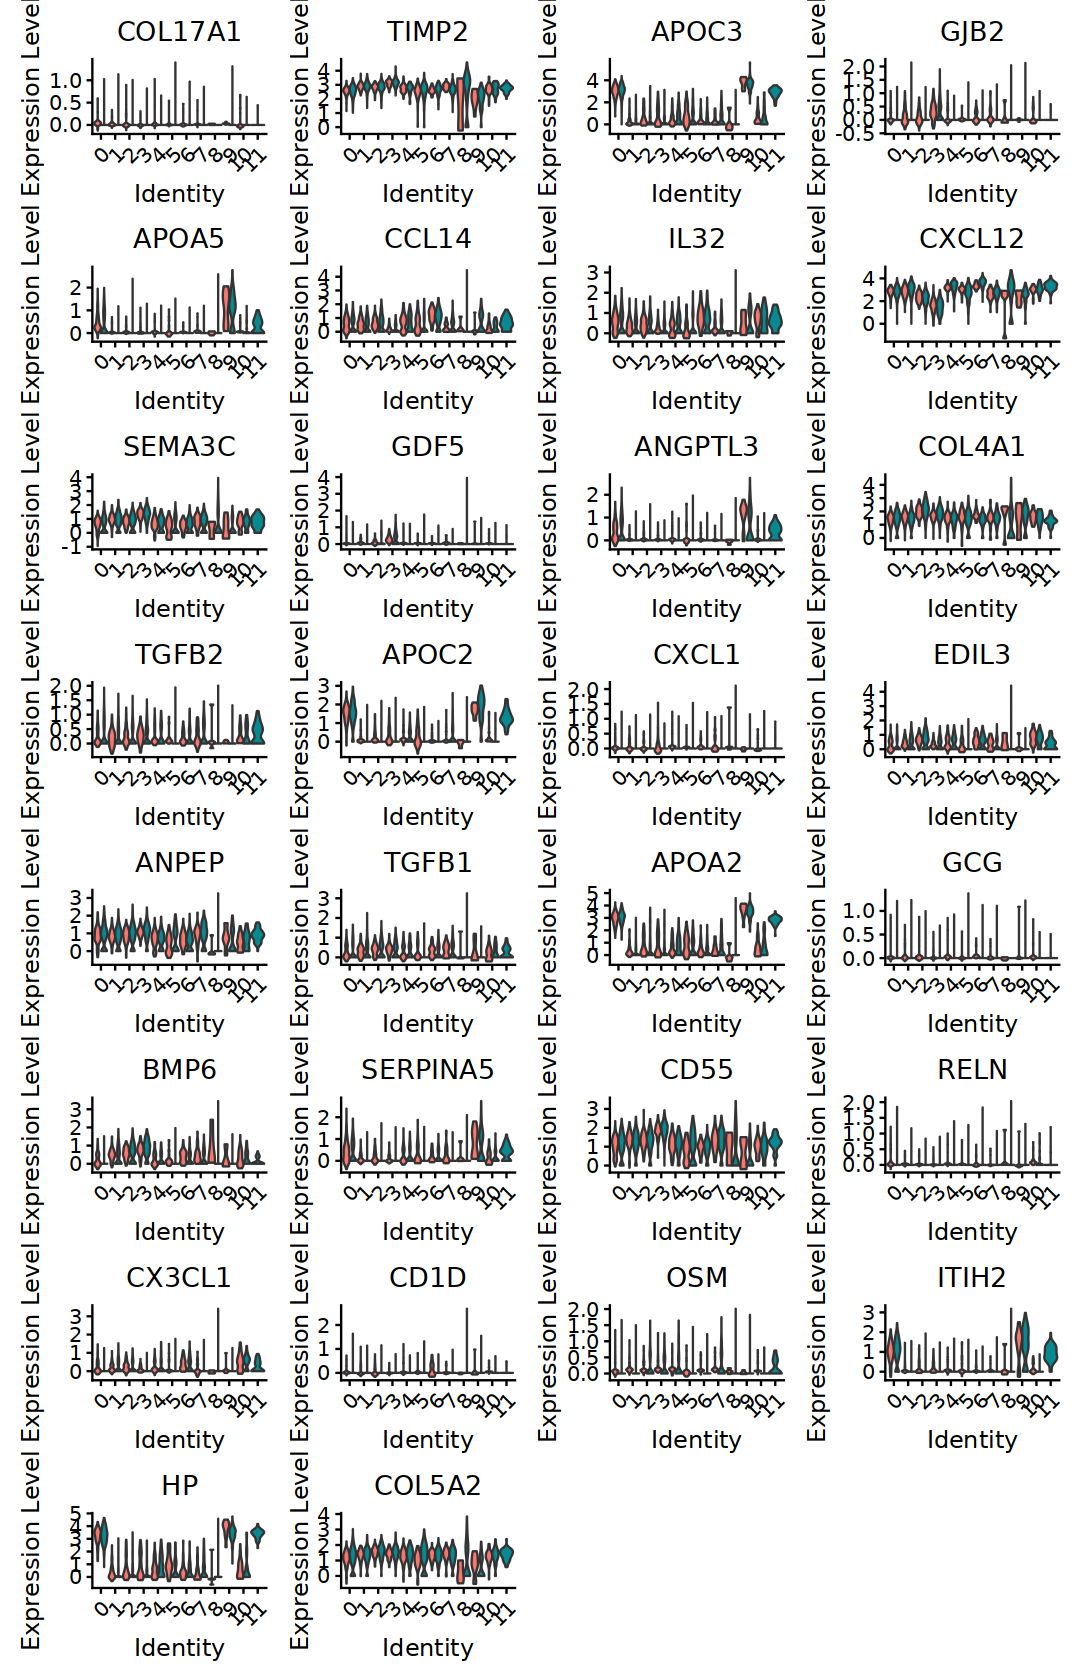

In [98]:
VlnPlot(seuratObj, features = nichenet_output$top_ligands, split.by = "orig.ident", pt.size = 0, combine = T)

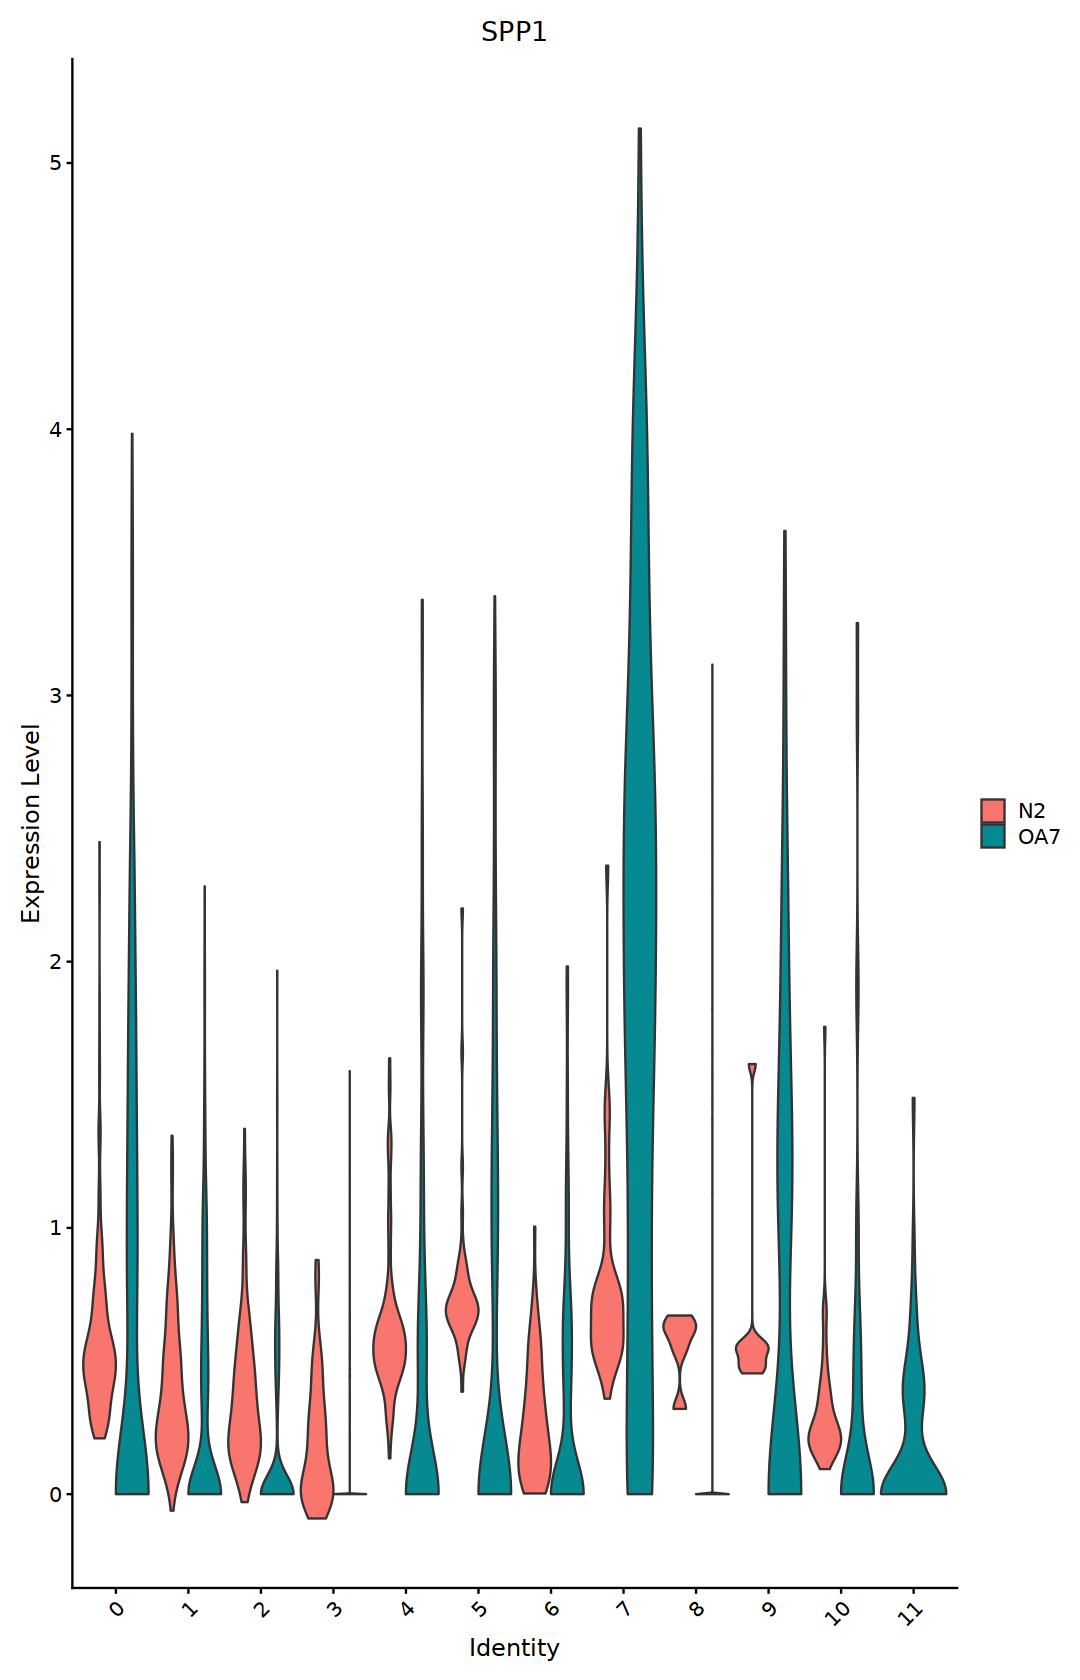

In [99]:
VlnPlot(seuratObj, features = 'SPP1', split.by = "orig.ident", pt.size = 0, combine = T)

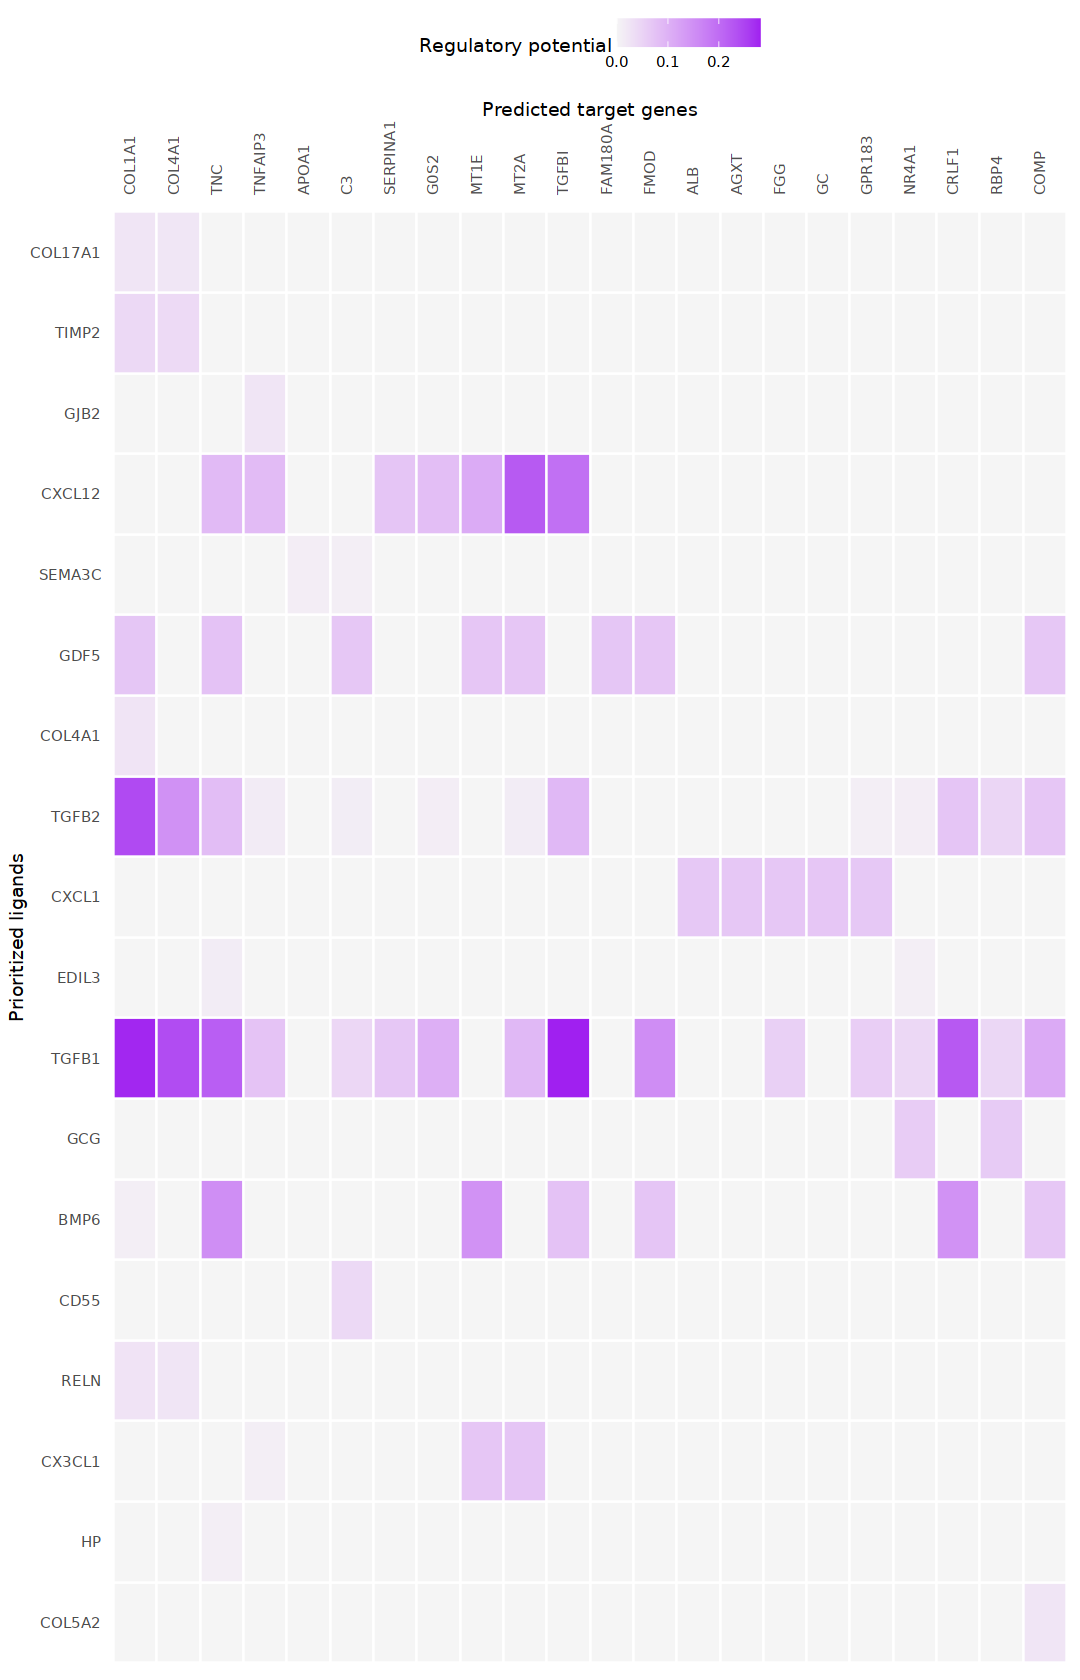

In [100]:
nichenet_output$ligand_target_heatmap

In [101]:
x = nichenet_output$top_targets

In [102]:
x

[1] "COL1A1"   "COL4A1"   "TNC"      "TNFAIP3"  "APOA1"    "C3"      
 [7] "SERPINA1" "G0S2"     "MT1E"     "MT2A"     "TGFBI"    "FAM180A" 
[13] "FMOD"     "ALB"      "AGXT"     "FGG"      "GC"       "GPR183"  
[19] "NR4A1"    "CRLF1"    "RBP4"     "COMP"

In [103]:
options(repr.plot.width = 8,repr.plot.height = 5)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


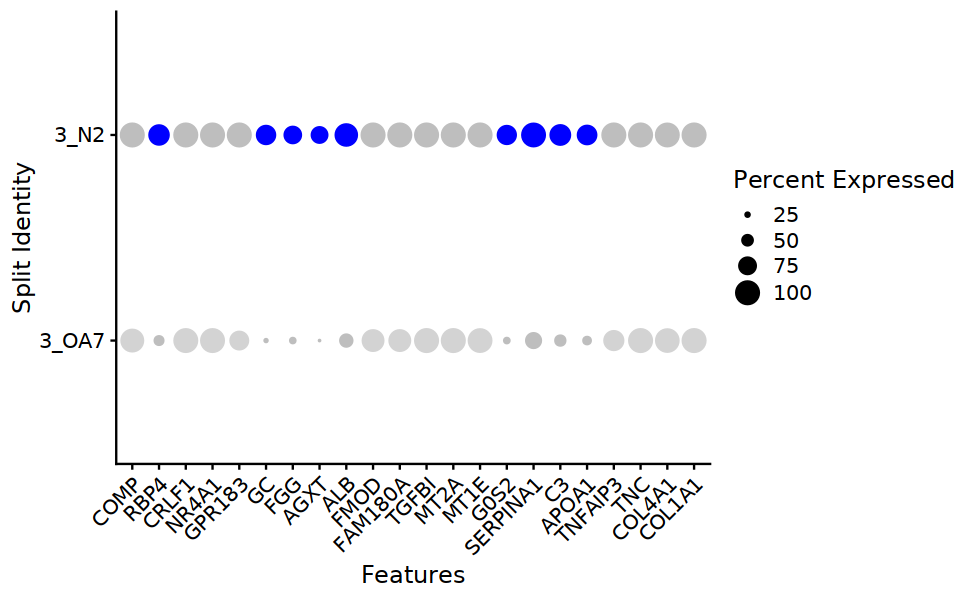

In [104]:
DotPlot(seuratObj %>% subset(idents = "3"), features = nichenet_output$top_targets %>% rev(), split.by = "orig.ident") +
RotatedAxis()

In [105]:
options(repr.plot.width = 4,repr.plot.height = 4)

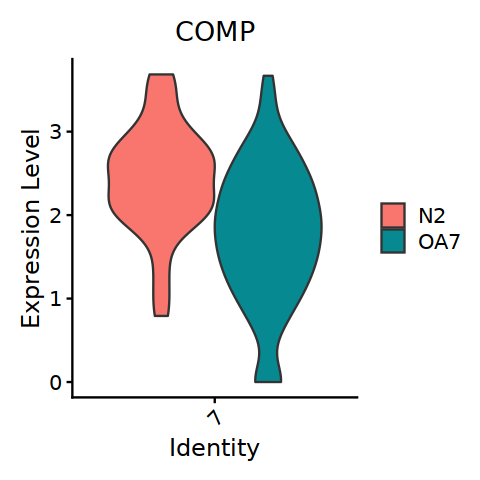

In [106]:
VlnPlot(seuratObj %>% subset(idents = "7"), features = c("COMP"),
        split.by = "orig.ident",    pt.size = 0, combine = T)

In [107]:
options(repr.plot.width = 12,repr.plot.height = 12)

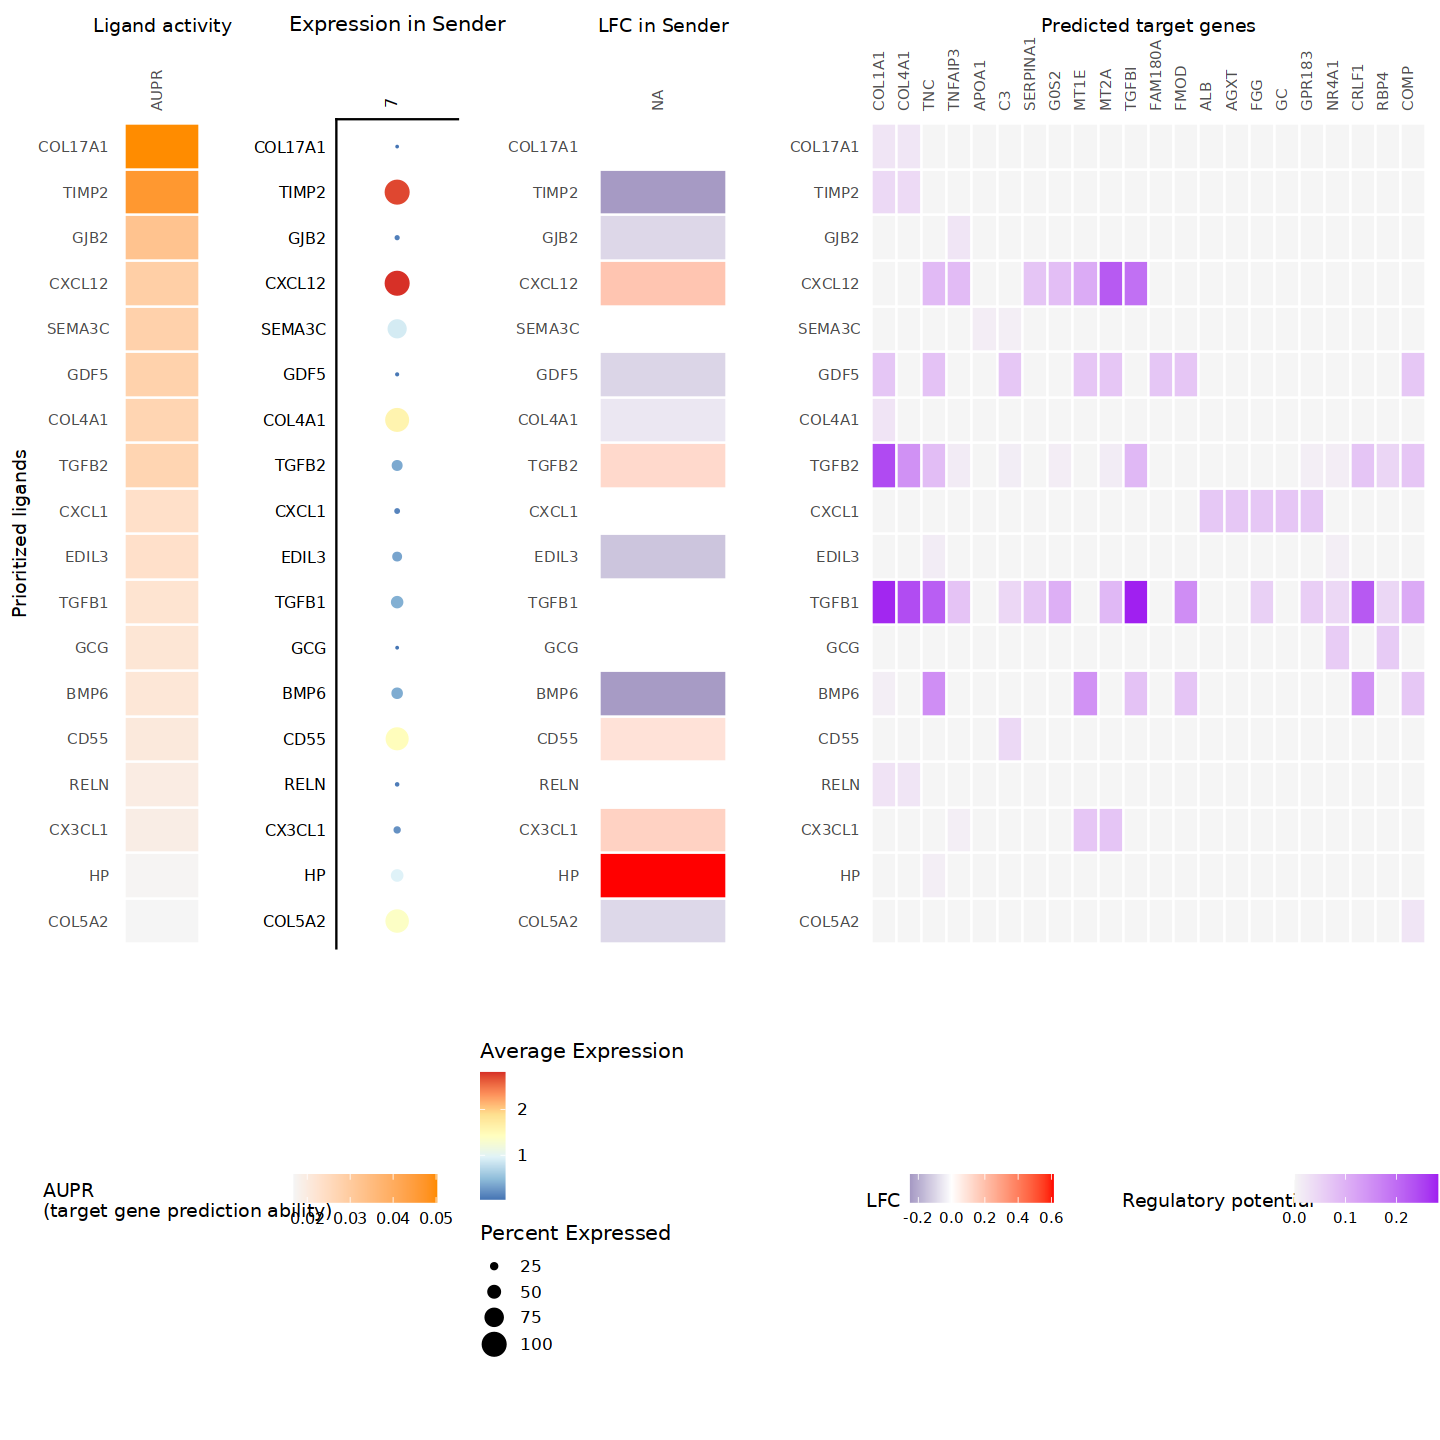

In [108]:
nichenet_output$ligand_activity_target_heatmap

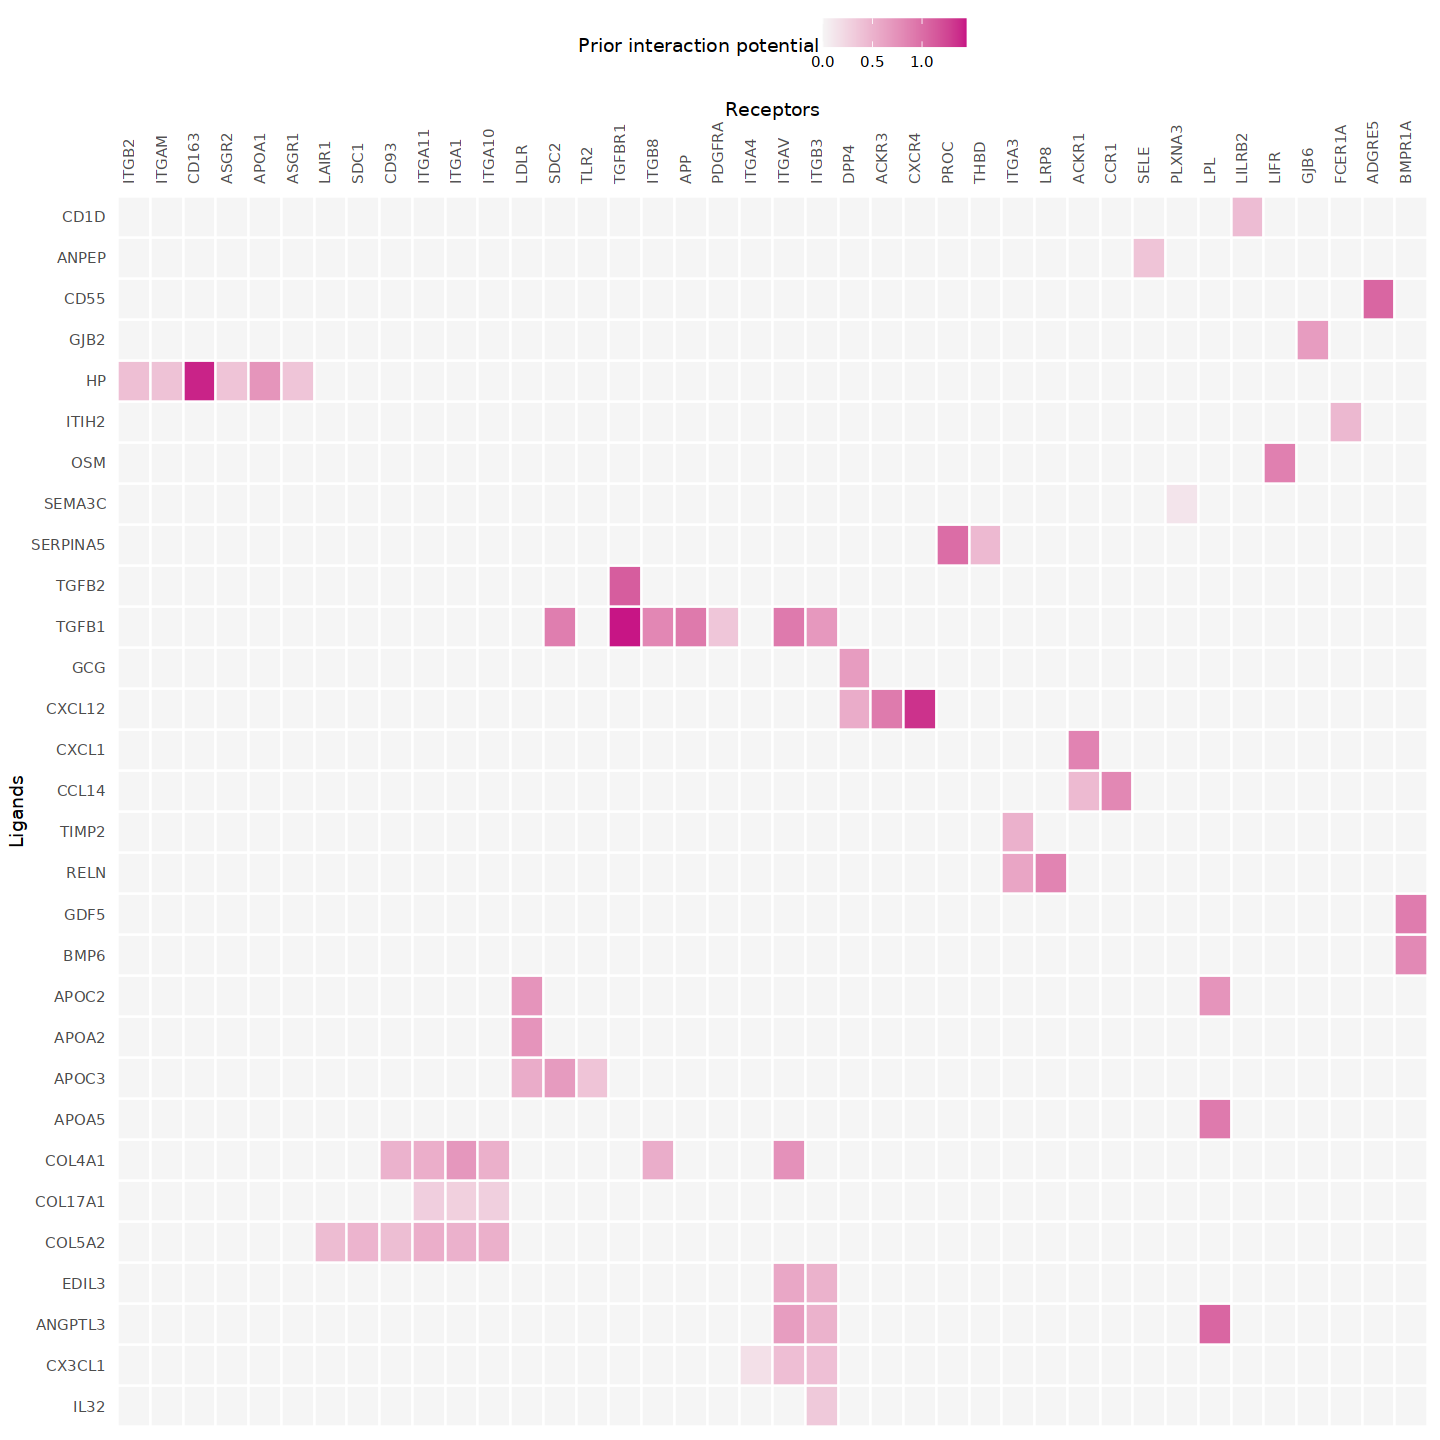

In [109]:
 nichenet_output$ligand_receptor_heatmap

In [110]:
options(repr.plot.width = 18,repr.plot.height = 5)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


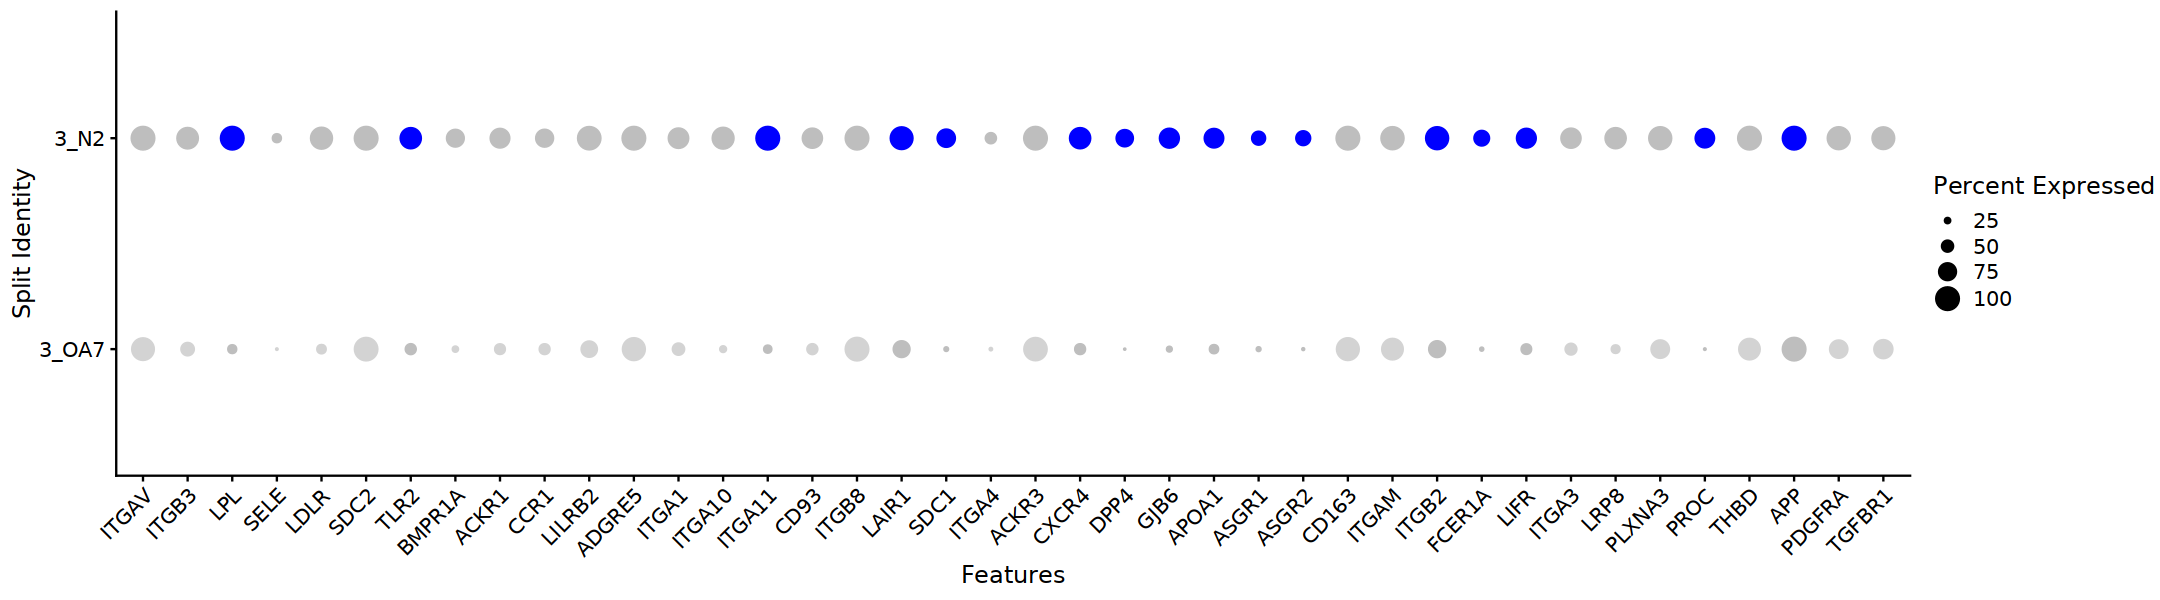

In [111]:
 DotPlot(seuratObj %>% subset(idents = "3"), 
             features = nichenet_output$top_receptors, 
             split.by = "orig.ident") + RotatedAxis()